### Problem Statement

In [1]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.random_test(7)

### Exact solutions

[Qibo 0.2.7|INFO|2024-05-22 15:41:31]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-05-22 15:41:31]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-22 15:41:31]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Best feasible profit: 429
Minimum energy: -451.131
Minimum energy without offset: -2223.074249999999
s = 0 : [(-7.000000000000017+8.761197570834197e-32j), (-5.000000000000019-1.7453740121009325e-34j)]
s = 1 : [(-222.54533266249473+0j), (-214.73671459262548+0j)]
s = 2 : [(-444.7094516386543+0j), (-429.4587240426075+0j)]
s = 3 : [(-666.9706135887646+0j), (-644.1851909948956+0j)]
s = 4 : [(-889.256344323097+0j), (-858.9124717003195+0j)]
s = 5 : [(-1111.5519293124662+0j), (-1073.6400518624334+0j)]
s = 6 : [(-1333.8524460865551+0j), (-1288.36777721879+0j)]
s = 7 : [(-1556.1557821443373+0j), (-1503.0955844520488+0j)]
s = 8 : [(-1778.4608805746782+0j), (-1717.8234425466408+0j)]
s = 9 : [(-2000.767154018295+0j), (-1932.5513344531466+0j)]
s = 10 : [(-2223.0742499999997+0j), (-2147.27925+0j)]


c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


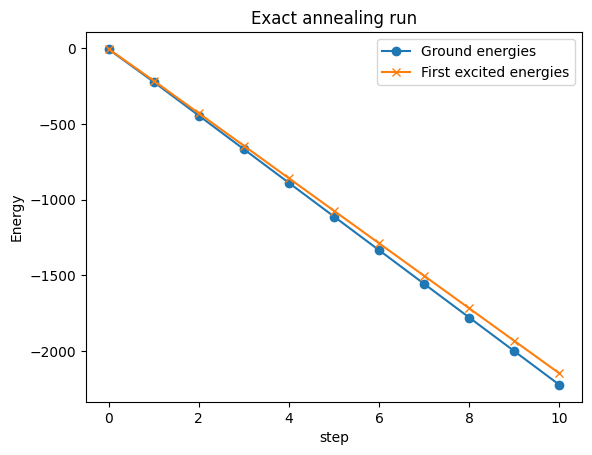

estimated minimum gap:  (1.9999999999999982-8.778651310955207e-32j)


In [2]:
from exact_solver import Exact_solver

exact_solver = Exact_solver(W_capacity, weights, values)

best_feasible_profit, minimum_energy = exact_solver.run()

print(f'Best feasible profit: {best_feasible_profit}')
print(f'Minimum energy: {minimum_energy}')
print(f'Minimum energy without offset: {minimum_energy - exact_solver.offset}')


exact_solver.annealing_run(10)

### DP

In [3]:
from dp_solver import DP_solver

dp_solver = DP_solver(W_capacity, weights, values)
items_in_solution = dp_solver.run()
dp_solver.show_solution()

-------- Solution has items:  [1, 3, 4, 5] --------
 - Evaluating candidate  [1, 3, 4, 5]
Profit: 429
Weight: 95 (satisfies constraint W=101)
Energy: -451.131
-------------------------------------------------


### Simulated annealing

In [4]:
from neal_solver import Neal_annealing_solver

H_solver = Neal_annealing_solver(W_capacity, weights, values)
neal_solution_items = H_solver.run()
H_solver.show_solution()

# H_solver.energy_of_items(items_in_solution)


-------- Solution has items:  [1, 3, 4, 5] --------
 - Evaluating candidate  [1, 3, 4, 5]
Profit: 429
Weight: 95 (satisfies constraint W=101)
Energy: -451.131
-------------------------------------------------


[Qibo 0.2.7|WARNING|2024-05-22 15:41:32]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-22 15:41:32]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Exact solution has items:  [1, 3, 4, 5]
fins aqui
Target energy -2223.0742499999997
+ offset (1771.9432499999994) = -451.1310000000003
final annealing energy:  -941.2071147221376
-------- Solution has items:  [0, 1, 3, 5] --------
 - Evaluating candidate  [0, 1, 3, 5]
Profit: 404
Weight: 112 (does NOT satisfy constraint W=101)
Energy: -328.738
-------------------------------------------------


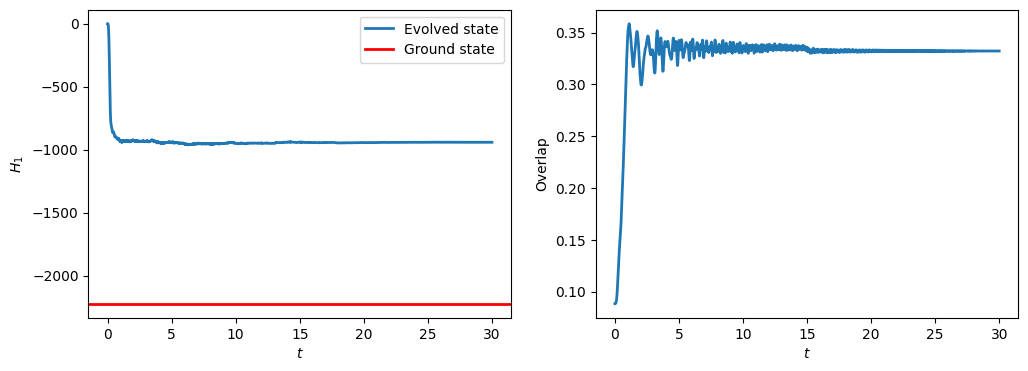

In [5]:
from qibo_solver import Qibo_annealing_solver

Qibo_solver = Qibo_annealing_solver(W_capacity, weights, values)
Qibo_solver.exact_solution()
h1 = Qibo_solver.get_ham()
print('fins aqui')

T = 30 # Total time of the adiabatic evolution.
Qibo_solver.run(T)
Qibo_solver.show_solution()

### DMRG

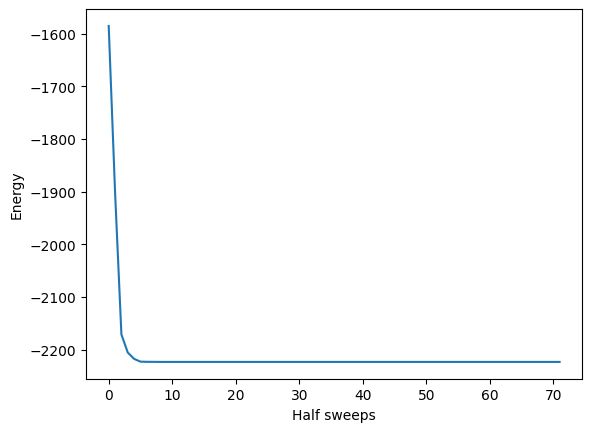

Solution energy = -2223.0742499999983 + 1771.9432499999994 (offset) = -451.13099999999895
-------- Solution has items:  [1, 3, 4, 5] --------
 - Evaluating candidate  [1, 3, 4, 5]
Profit: 429
Weight: 95 (satisfies constraint W=101)
Energy: -451.131
-------------------------------------------------
 **** Neal solution:  [1, 3, 4, 5] ****

 Neal solution:
 - Evaluating candidate  0101110
Energy: -2223.07425
+ offset (1771.9432499999994) = -451.13100000000077


In [6]:
from dmrg_solver import DMRG_solver

chi = 32
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)

numsweeps = 6 # number of DMRG sweeps
qkp_DMRG.run(numsweeps)

qkp_DMRG.show_solution()

print(' **** Neal solution: ', neal_solution_items, '****')

def convert_to_string(lst, N):
    result = ['0'] * (N)
    for i in lst:
        result[i] = '1'
    return ''.join(result)

print('\n Neal solution:')
qkp_DMRG.energy_of_items(convert_to_string(neal_solution_items, qkp_DMRG.N))


 ---- s= 0  ----
Solution energy = -7.00000000000001 + 1771.9432499999994 (offset) = 1764.9432499999994
DMRG energy:  -7.00000000000001
Real gap:  [(-7.000000000000013+0j), (-5.000000000000022+0j)]
 ---- s= 1  ----
Solution energy = -222.54533266249277 + 1771.9432499999994 (offset) = 1549.3979173375067
DMRG energy:  -222.54533266249277
Real gap:  [-222.54533266249456, -214.73671459262565]
 ---- s= 2  ----
Solution energy = -444.70945163857516 + 1771.9432499999994 (offset) = 1327.2337983614243
DMRG energy:  -444.70945163857516
Real gap:  [-444.7094516386533, -429.4587240426084]
 ---- s= 3  ----
Solution energy = -666.9706135887599 + 1771.9432499999994 (offset) = 1104.9726364112394
DMRG energy:  -666.9706135887599
Real gap:  [-666.9706135887701, -644.1851909948944]
 ---- s= 4  ----
Solution energy = -889.2563443230963 + 1771.9432499999994 (offset) = 882.686905676903
DMRG energy:  -889.2563443230963
Real gap:  [-889.2563443230988, -858.9124717003215]
 ---- s= 5  ----
Solution energy = -11

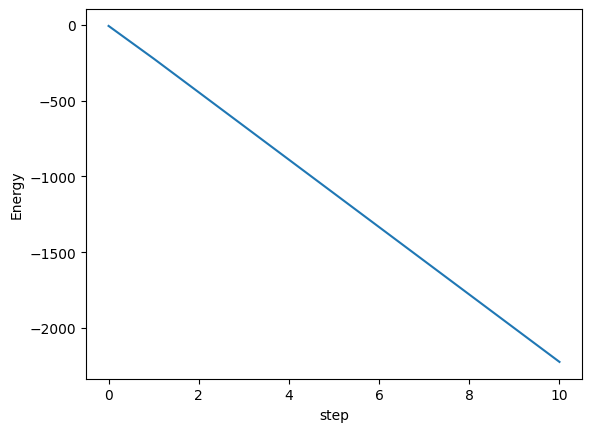

In [7]:
qkp_DMRG.annealing_run()